In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

2025-05-01 16:57:03.919355: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 16:57:03.958145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 16:57:04.042190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746118624.149901  127960 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746118624.183659  127960 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746118624.285608  127960 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

2025-04-30 04:50:05.621811: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 04:50:05.625980: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 04:50:05.637599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
E0000 00:00:1745988605.654656   17228 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745988605.659870   17228 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745988605.672958   17228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745988605.672994   17228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745988605.673008   17228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745988605.673020   17228 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
2025-04-30 04:50:05.678058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

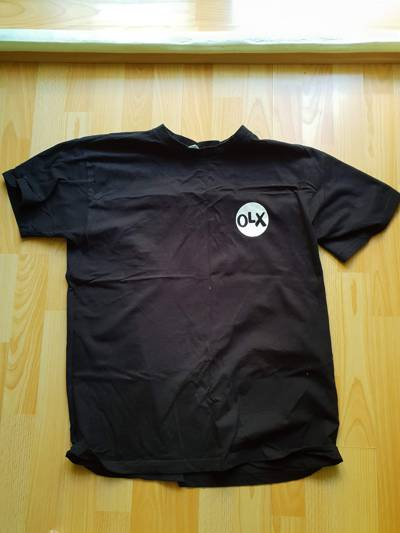

In [6]:
path = '../data/clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))
load_img(fullname)

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F82F6F5F010>


In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

2025-05-01 16:57:09.583727: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
# model expects some preprocessing
X = preprocess_input(X)
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.68196255)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140155)),
  ('n04370456', 'sweatshirt', np.float32(0.034324866)),
  ('n03710637', 'maillot', np.float32(0.011354228)),
  ('n04525038', 'velvet', np.float32(0.0018453641))]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [61]:
train_ds = train_gen.flow_from_directory(
    '../data/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [62]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [63]:
!ls -l ../data/clothing-dataset-small/train

total 256
drwxr-xr-x 2 jguevarra sudo 20480 Apr 30 04:39 dress
drwxr-xr-x 2 jguevarra sudo 12288 Apr 30 04:39 hat
drwxr-xr-x 2 jguevarra sudo 36864 Apr 30 04:39 longsleeve
drwxr-xr-x 2 jguevarra sudo 20480 Apr 30 04:39 outwear
drwxr-xr-x 2 jguevarra sudo 36864 Apr 30 04:39 pants
drwxr-xr-x 2 jguevarra sudo 20480 Apr 30 04:39 shirt
drwxr-xr-x 2 jguevarra sudo 20480 Apr 30 04:39 shoes
drwxr-xr-x 2 jguevarra sudo 20480 Apr 30 04:39 shorts
drwxr-xr-x 2 jguevarra sudo 12288 Apr 30 04:39 skirt
drwxr-xr-x 2 jguevarra sudo 61440 Apr 30 04:39 t-shirt


In [64]:
X, y = next(train_ds)

In [65]:
# columns are classification, rows are predictions
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [66]:
# now do the same for validataion set
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_ds = val_gen.flow_from_directory(
    '../data/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [67]:
# include_top=False don't include "Dense" or "Top" layer
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False # freeze Convolutional "bottom" layers


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [68]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # good for multi-class classifier
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [69]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7/96 ━━━━━━━━━━━━━━━━━━━━ 58s 653ms/step - accuracy: 0.3151 - loss: 2.5753

KeyboardInterrupt: 

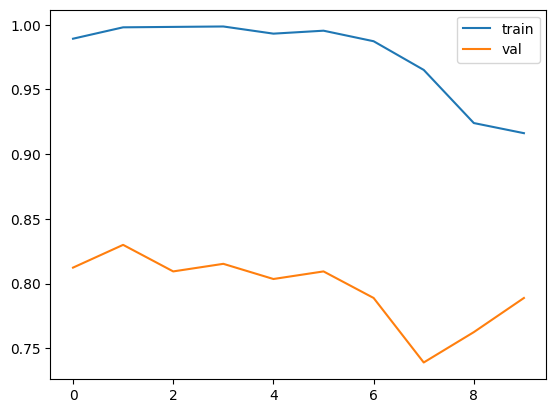

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

Adjusting Learning Rate

In [ ]:

def make_model(learning_rate=0.01):
    # include_top=False don't include "Dense" or "Top" layer
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False # freeze Convolutional "bottom" layers

    # build model
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    # train model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # good for multi-class classifier
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [ ]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f'learning rate: {lr}')
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print()
    print()

learning rate: 0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.2885 - loss: 2.0601

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 716ms/step - accuracy: 0.2894 - loss: 2.0580 - val_accuracy: 0.4721 - val_loss: 1.5542
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 686ms/step - accuracy: 0.5349 - loss: 1.4423 - val_accuracy: 0.6012 - val_loss: 1.2159
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 670ms/step - accuracy: 0.6291 - loss: 1.1637 - val_accuracy: 0.6950 - val_loss: 1.0373
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 696ms/step - accuracy: 0.6830 - loss: 1.0089 - val_accuracy: 0.7302 - val_loss: 0.9324
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 665ms/step - accuracy: 0.7187 - loss: 0.9056 - val_accuracy: 0.7507 - val_loss: 0.8627
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 651ms/step - accuracy: 0.7262 - loss: 0.8518 - val_accuracy: 0.7683 - val_loss: 0.8098
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 684ms/step - accuracy: 0.7436 - loss: 0.7929 - val_accuracy: 0.7654 - val_loss: 0.7723
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 641ms/step - accuracy: 0.7510 - loss: 0.7634 - val_accuracy: 0.777

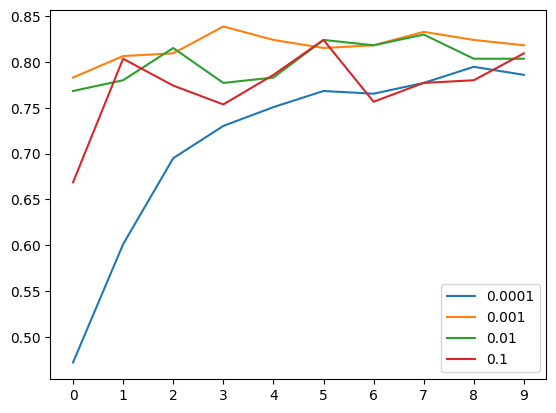

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    #plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

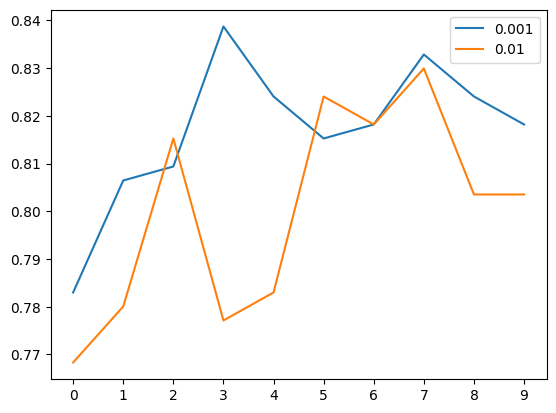

In [ ]:

# remove worse rates, then compare to get the best one
del scores[0.1]
del scores[0.0001]
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    #plt.plot(hist['accuracy'], label=lr)

plt.xticks(np.arange(10))
plt.legend()

0.001 seems to be the best.


In [ ]:
learning_rate=0.001

#8.7 Checkpointing
use callbacks after epochs are compelte.

In [ ]:
#model.save_weights('model_v1.h5', save_format='h5')
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [ ]:
learning_rate=0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.4861 - loss: 1.5180

96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 635ms/step - accuracy: 0.4875 - loss: 1.5139 - val_accuracy: 0.7713 - val_loss: 0.7089
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.7867 - loss: 0.6319

96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 625ms/step - accuracy: 0.7867 - loss: 0.6319 - val_accuracy: 0.7977 - val_loss: 0.6150
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.8321 - loss: 0.5140

96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 607ms/step - accuracy: 0.8321 - loss: 0.5139 - val_accuracy: 0.8123 - val_loss: 0.5974
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.8576 - loss: 0.4435

96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 635ms/step - accuracy: 0.8576 - loss: 0.4433 - val_accuracy: 0.8299 - val_loss: 0.5534
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.8818 - loss: 0.3810

96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 627ms/step - accuracy: 0.8818 - loss: 0.3809 - val_accuracy: 0.8358 - val_loss: 0.5354
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 602ms/step - accuracy: 0.9146 - loss: 0.3202 - val_accuracy: 0.8240 - val_loss: 0.5338
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 613ms/step - accuracy: 0.9293 - loss: 0.2721 - val_accuracy: 0.8299 - val_loss: 0.5349
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 610ms/step - accuracy: 0.9303 - loss: 0.2546 - val_accuracy: 0.8270 - val_loss: 0.5277
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 612ms/step - accuracy: 0.9463 - loss: 0.2371 - val_accuracy: 0.8270 - val_loss: 0.5392
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.9523 - loss: 0.2118 - val_accuracy: 0.8240 - val_loss: 0.5272


Add more layers to improve accuracy

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    # include_top=False don't include "Dense" or "Top" layer
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False # freeze Convolutional "bottom" layers

    # build model
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    # train model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # good for multi-class classifier
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 709ms/step - accuracy: 0.3220 - loss: 1.8486 - val_accuracy: 0.5191 - val_loss: 1.2918
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 720ms/step - accuracy: 0.6484 - loss: 1.0534 - val_accuracy: 0.6950 - val_loss: 0.9001
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 721ms/step - accuracy: 0.7649 - loss: 0.7100 - val_accuracy: 0.7742 - val_loss: 0.7116
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 819ms/step - accuracy: 0.8272 - loss: 0.5536 - val_accuracy: 0.7830 - val_loss: 0.6556
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 783ms/step - accuracy: 0.8443 - loss: 0.4655 - val_accuracy: 0.7947 - val_loss: 0.6252
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 804ms/step - accuracy: 0.8668 - loss: 0.4110 - val_accuracy: 0.8035 - val_loss: 0.5950
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 798ms/step - accuracy: 0.9009 - loss: 0.3597 - val_accuracy: 0.8152 - val_loss: 0.5804
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 736ms/step - accuracy: 0.9179 - loss: 0.3171 - val_a

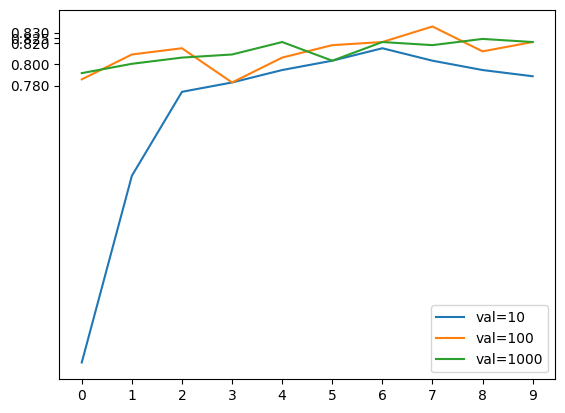

In [70]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [71]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [72]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.5927 - loss: 1.2566

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 660ms/step - accuracy: 0.5936 - loss: 1.2534 - val_accuracy: 0.7771 - val_loss: 0.7011
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 598ms/step - accuracy: 0.8303 - loss: 0.5120 - val_accuracy: 0.7889 - val_loss: 0.5700
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 619ms/step - accuracy: 0.8776 - loss: 0.3546 - val_accuracy: 0.7918 - val_loss: 0.6145
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 603ms/step - accuracy: 0.9169 - loss: 0.2688 - val_accuracy: 0.8211 - val_loss: 0.5243
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 620ms/step - accuracy: 0.9575 - loss: 0.1732 - val_accuracy: 0.8123 - val_loss: 0.5608
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.9749 - loss: 0.1155 - val_accuracy: 0.8094 - val_loss: 0.5272
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 634ms/step - accuracy: 0.9918 - loss: 0.0741 - val_accuracy: 0.8446 - val_loss: 0.5450
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.9949 - loss: 0.0543 - val_accuracy: 0.829

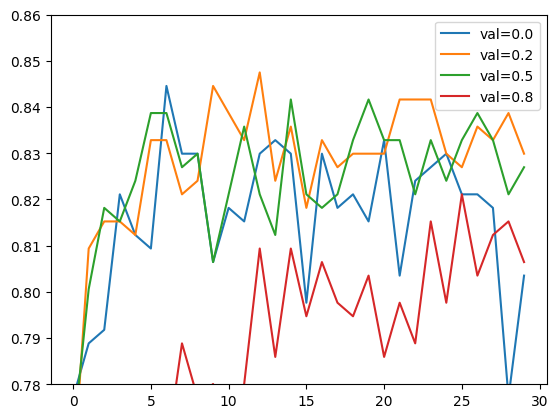

In [73]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

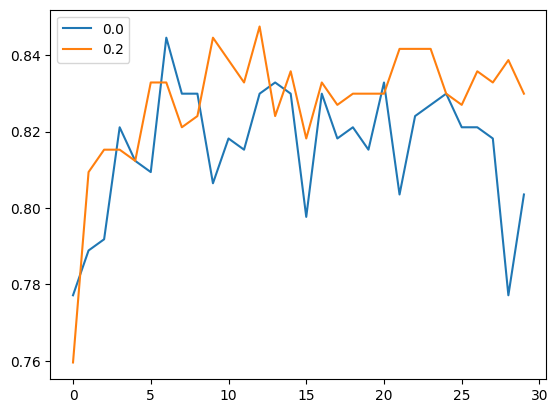

In [74]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [75]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # vertical_flip = True
)

train_ds = train_gen.flow_from_directory(
    '../data/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = val_gen.flow_from_directory(
    '../data/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)





Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [76]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.1135 - loss: 2.9898 - val_accuracy: 0.3754 - val_loss: 1.7903
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5143 - loss: 1.6033 - val_accuracy: 0.6041 - val_loss: 1.3235
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5702 - loss: 1.4175 - val_accuracy: 0.6745 - val_loss: 1.0100
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6918 - loss: 0.9664 - val_accuracy: 0.8006 - val_loss: 0.7743
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7802 - loss: 0.8042 - val_accuracy: 0.8651 - val_loss: 0.6001
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7552 - loss: 0.7755 - val_accuracy: 0.8915 - val_loss: 0.4881
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8797 - loss: 0.4724 - val_accuracy: 0.9150 - val_loss: 0.4023
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8616 - loss: 0.5416 - val_accuracy: 0.9501 - val_loss:

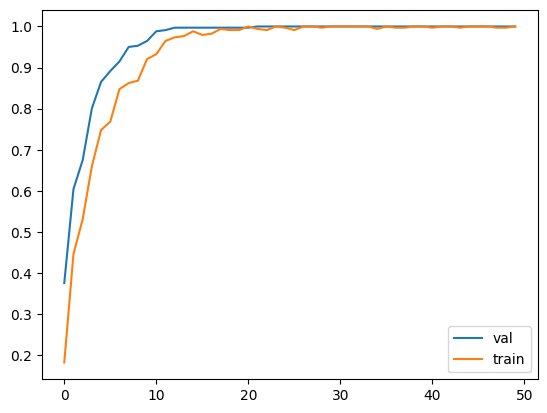

In [77]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [114]:
input_size = 299

In [115]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [119]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # vertical_flip = True
)

train_ds = train_gen.flow_from_directory(
    '../data/clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '../data/clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [120]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [121]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5813 - loss: 1.3139

96/96 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.5826 - loss: 1.3098 - val_accuracy: 0.8504 - val_loss: 0.5131
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8398 - loss: 0.4797

96/96 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.8398 - loss: 0.4796 - val_accuracy: 0.8680 - val_loss: 0.4209
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.8688 - loss: 0.3878 - val_accuracy: 0.8651 - val_loss: 0.4010
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8779 - loss: 0.3426

96/96 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.8781 - loss: 0.3424 - val_accuracy: 0.8798 - val_loss: 0.3899
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8918 - loss: 0.3071 - val_accuracy: 0.8739 - val_loss: 0.3745
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.9163 - loss: 0.2595 - val_accuracy: 0.8798 - val_loss: 0.3609
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9238 - loss: 0.2283

96/96 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9238 - loss: 0.2283 - val_accuracy: 0.8886 - val_loss: 0.3522
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9329 - loss: 0.2130 - val_accuracy: 0.8827 - val_loss: 0.3511
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9424 - loss: 0.1927

96/96 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.9423 - loss: 0.1927 - val_accuracy: 0.8915 - val_loss: 0.3482
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9412 - loss: 0.1809

96/96 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.9413 - loss: 0.1809 - val_accuracy: 0.8974 - val_loss: 0.3628
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9482 - loss: 0.1623 - val_accuracy: 0.8827 - val_loss: 0.3650
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9523 - loss: 0.1550 - val_accuracy: 0.8798 - val_loss: 0.3679
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.9539 - loss: 0.1482 - val_accuracy: 0.8886 - val_loss: 0.3632
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9614 - loss: 0.1394 - val_accuracy: 0.8856 - val_loss: 0.3645
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9687 - loss: 0.1088 - val_accuracy: 0.8768 - val_loss: 0.3578
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9705 - loss: 0.1060 - val_accuracy: 0.8710 - val_loss: 0.3770
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.9772 - loss: 0.0979 - val_accuracy: 0.8915 - val_l

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [1]:
import tensorflow as tf
from tensorflow import keras

2025-05-05 23:08:22.938205: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 23:08:23.077451: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 23:08:23.196681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746486503.455612 1057971 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746486503.537411 1057971 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746486503.849062 1057971 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [3]:
image_input_dim = 299


In [4]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '../data/clothing-dataset-small/test',
    target_size=(image_input_dim, image_input_dim),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [5]:
model_file_name = 'xception_v4_1_10_0.897.h5'
model = keras.models.load_model(model_file_name)

2025-05-05 23:10:19.577398: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.evaluate(test_ds)

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8541 - loss: 0.3267


[0.27636396884918213, 0.8870967626571655]

In [7]:
path = '../data/clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [8]:
img = load_img(path, target_size=(image_input_dim, image_input_dim))

In [9]:
import numpy as np

In [10]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [14]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [12]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [15]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-2.1768029),
 'hat': np.float32(-4.422605),
 'longsleeve': np.float32(-1.1787457),
 'outwear': np.float32(-2.7125375),
 'pants': np.float32(9.238702),
 'shirt': np.float32(-0.91235983),
 'shoes': np.float32(-4.5684),
 'shorts': np.float32(2.552033),
 'skirt': np.float32(-4.480401),
 't-shirt': np.float32(-1.3636638)}

In [16]:
pred

array([[-2.1768029 , -4.422605  , -1.1787457 , -2.7125375 ,  9.238702  ,
        -0.91235983, -4.5684    ,  2.552033  , -4.480401  , -1.3636638 ]],
      dtype=float32)